# Post process the segmentation (binary mask) in order to have a mask of only the holes in the image (corresponding to the wound hopefuly)

### To analyse the wound shape, running this code is necessary before the shape_descriptor.ipynb and Plot_data.ipynb codes.

Import the modules:

In [1]:
from placozoan.func_segmentation import get_holes_mask
from placozoan.utils import load_params, load_tiff, save_tiff
from pathlib import Path
from napari import Viewer

Load Parameter for the wound detection

In [2]:
# load params

param_path = Path('../parameters/default_holes_finder.yml')
params = load_params(param_path)
params

{'input': {'path': '../data/results/contrast_masked_chanvese.tif',
  'axes': 'TYX',
  'rearrange_pattern': 'None'},
 'output': {'path': '../data/results/wound_chanvese_contrasted_mask.tif',
  'axes': 'TYX',
  'rearrange_pattern': 'None'}}

Insert the segmented image (binary mask) name of the entire organism

In [3]:
# load image

im_path = Path(params["input"]["path"])
im_axes = params["input"]["axes"]
im = load_tiff(im_path, im_axes) # take only a slice of the image for demo

Extract the wound shape from the organism segmentation.

In [4]:
mask = get_holes_mask(im)

Save the final wound mask as tif file

In [5]:
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

WindowsPath('../data/results/wound_chanvese_contrasted_mask.tif')

# Matplotlib Viewer

In [6]:
import matplotlib.pyplot as plt

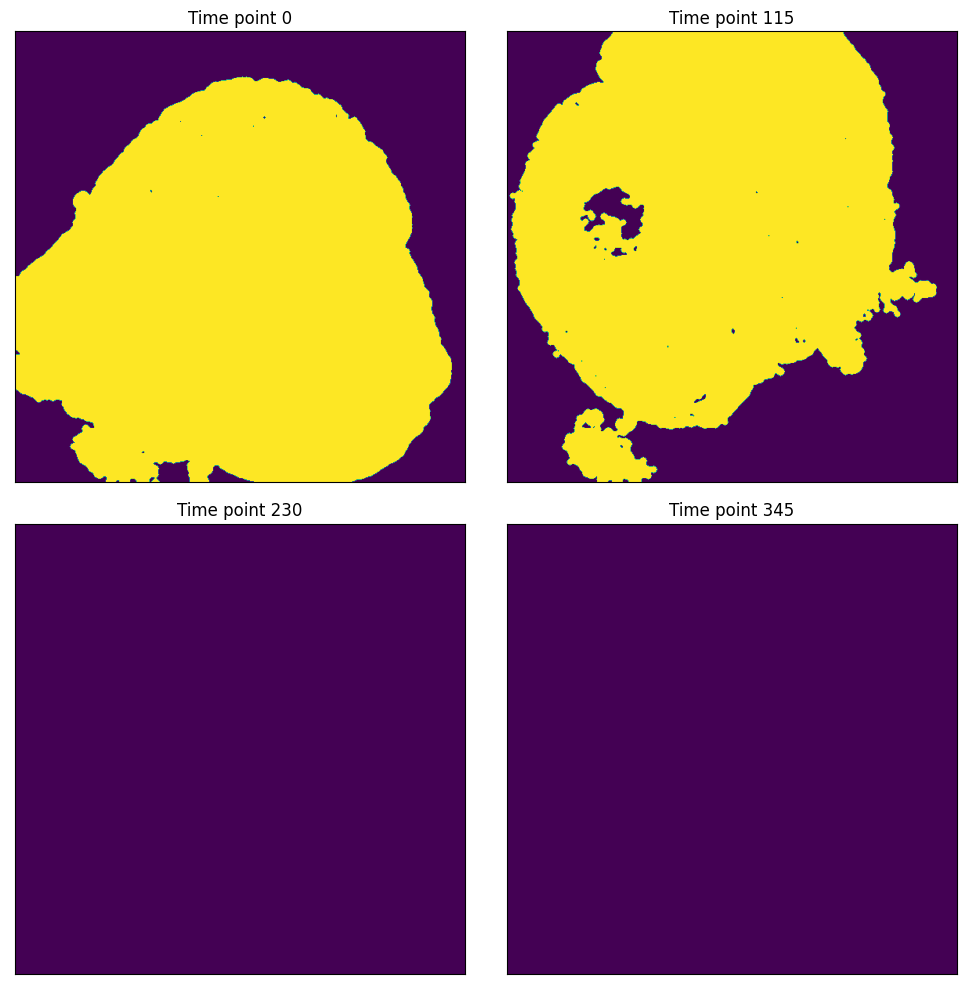

In [7]:
nb_time_points = len(im)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'aspect':1}, sharex=True, sharey=True)
axes = axes.flatten()
for i, ax in enumerate(axes):
    tp = i*(nb_time_points-1)//(len(axes)-1)
    if i // 2 == 0:
        ax.imshow(im[tp, ...])
    else:
        ax.imshow(mask[tp, ...])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Time point {tp}')
fig.tight_layout()

# Napari Viewer

In [8]:
viewer = Viewer()

In [9]:
im_layer = viewer.add_image(im)
mask_layer = viewer.add_labels(mask)

In [ ]:
# if you want to save the manually corrected mask run this cell
mask_corrected = mask_layer.data
output_path = Path(params["output"]["path"])
output_axes = params["output"]["axes"]
save_tiff(output_path, mask, output_axes)

PosixPath('../data/results/wound_mask.tif')